<a href="https://colab.research.google.com/github/Chieh-hung/CV-lab-project-1/blob/master/cvlab_2020_winter_project_A_106060005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc 140.114.85.52:8000/pA1.csv
!wget -nc 140.114.85.52:8000/pA2.csv

--2020-01-26 04:57:49--  http://140.114.85.52:8000/pA1.csv
Connecting to 140.114.85.52:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604 [text/csv]
Saving to: ‘pA1.csv’

pA1.csv             100%[===================>]     604  --.-KB/s    in 0s      

2020-01-26 04:57:49 (90.4 MB/s) - ‘pA1.csv’ saved [604/604]

--2020-01-26 04:57:53--  http://140.114.85.52:8000/pA2.csv
Connecting to 140.114.85.52:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631 [text/csv]
Saving to: ‘pA2.csv’

pA2.csv             100%[===================>]     631  --.-KB/s    in 0s      

2020-01-26 04:57:53 (136 MB/s) - ‘pA2.csv’ saved [631/631]



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [0]:
seed = 999
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

Parameter containing:
tensor([4.9948], requires_grad=True)
Parameter containing:
tensor([4.1474], requires_grad=True)


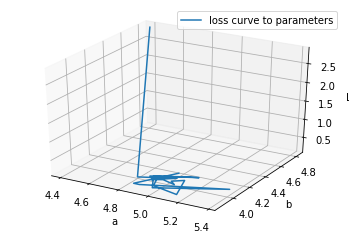

Parameter containing:
tensor([-1.8965], requires_grad=True)
Parameter containing:
tensor([1.2241], requires_grad=True)
Parameter containing:
tensor([4.0224], requires_grad=True)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1.4946521544456481, 0.2605277061462402, 0.12295823574066161, 0.0654220724105835, 0.08287627220153809, 0.05959886074066162, 0.05125113487243652, 0.05324899196624756, 0.0539734935760498, 0.0691588592529297, 0.052547974586486815, 0.04038843154907226, 0.043561968803405765, 0.06301961898803711, 0.06070779323577881, 0.08835155010223389, 0.058095846176147464, 0.044278287887573244, 0.05462552547454834, 0.0511111307144165]


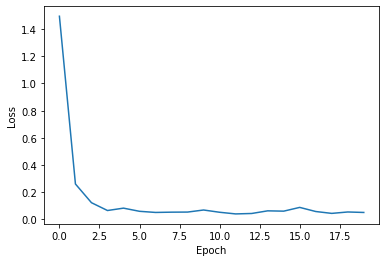

In [4]:
class Data:
    def __init__(self, csv_path):
        super().__init__()
        self.anns = pd.read_csv(csv_path).to_dict('records')

    def __len__(self):
        return len(self.anns)

    def __getitem__(self, idx):
        ann = self.anns[idx]
        x = torch.tensor(ann['x'])
        y = torch.tensor(ann['y'])
        return x, y


class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.rand(1) * 0.001)
        self.b = nn.Parameter(torch.rand(1) * 0.001)
    
    def forward(self, xs):
        ps = self.a * xs + self.b
        return ps

class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.rand(1) * 0.001)
        self.b = nn.Parameter(torch.rand(1) * 0.001)
        self.c = nn.Parameter(torch.rand(1) * 0.001)
    
    def forward(self, xs):
        ps = self.a * xs * xs + self.b *xs + self.c
        return ps        


loader1 = DataLoader(Data('./pA1.csv'), batch_size=1, shuffle=True)
loader2 = DataLoader(Data('./pA2.csv'), batch_size=1, shuffle=True)

device = 'cpu'
model1 = Net1().to(device)


criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-1)


history1 = {
    'loss': [],
    'a': [],
    'b': []
}

history2 = {
    'loss': [],
    'a': [],
    'b': [],
    'c': [],
    'idx':[]
}

plot1 = {
    'loss': [],
    'a':[],
    'b':[]
}

plot2 = {
    'loss': [],
    'idx':[]
}

for epoch in range(20):
    totalloss = 0
    for xs, ys in iter(loader1):
        xs = xs.to(device)
        ys = ys.to(device)

        optimizer.zero_grad()
        ps = model1(xs)
        loss1 = criterion(ps, ys)
        loss1.backward()
        optimizer.step()

        totalloss = totalloss + loss1.detach().item()

        history1['loss'].append(loss1.detach().item())
        history1['a'].append(model1.a.item())
        history1['b'].append(model1.b.item())
    plot1['loss'].append(totalloss/len(loader1))
    plot1['a'].append(model1.a.item())
    plot1['b'].append(model1.b.item())


print(model1.a)
print(model1.b)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(plot1['a'], plot1['b'], plot1['loss'], label='loss curve to parameters')
ax.legend()
ax.set_xlabel('a')
ax.set_ylabel('b') 
ax.set_zlabel('L')

plt.show()

model2 = Net2().to(device)
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-1)
for epoch in range(20):
    totalloss = 0
    for xs2, ys2 in iter(loader2):
        xs2 = xs2.to(device)
        ys2 = ys2.to(device)

        optimizer.zero_grad()
        ps2 = model2(xs2)
        loss2 = criterion(ps2, ys2)
        loss2.backward()
        optimizer.step()

        totalloss = totalloss + loss2.detach().item()

        history2['loss'].append(loss2.detach().item())
        history2['a'].append(model2.a.item())
        history2['b'].append(model2.b.item())
        history2['c'].append(model2.c.item())
    plot2['idx'].append(epoch)
    plot2['loss'].append(totalloss/len(loader2))

    

print(model2.a)
print(model2.b)
print(model2.c)

print(plot2['idx'])
print(plot2['loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(plot2['idx'], plot2['loss'])
plt.show()


# Report